**FORECASTING REAL ESTATE PRICES USING TIME SERIES MODEL**


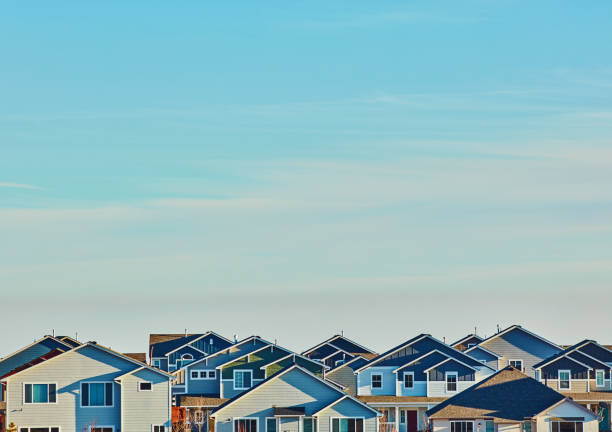


**DATA SCIENCE PHASE 4 PROJECT: MORINGA SCHOOL**

**GROUP 7 MEMBERS:**

*  JANET MUALUKO
*  ANDREW BARAKA
*  BRIAN MAINA
*  MILLICENT MUTHOMI
*  PHEMINA WAMBUI
*  CYNTHIA DALMAS




**INTRODUCTION**


Accurately predicting future prices has significant implications for buyers, sellers, and investors alike.This project uses time series analysis, a powerful tool for unraveling trends and patterns within sequential data. We leverage historical real estate price data, and aim to develop a robust forecasting model capable of predicting future values with greater accuracy.

This introduction sets the stage for us to explore the intricacies of data preparation, Exploratory data analysis, model selection, and evaluation, ultimately aiming to illuminate the path towards a more informed and predictable real estate future.



**BUSINESS UNDERSTANDING & PROBLEM STATEMENT**


The real estate market is complex and influenced by numerous factors, making
the identification of prime investment locations a significant challenge. Traditional methods often rely on limited data and subjective expertise, leading to inconsistencies and reduced decision-making power.

This project aims to develop a robust and data-driven model to identify the top 5 best zip codes for real estate investment. The model will leverage advanced analytics and machine learning techniques to analyze historical data on property characteristics, market trends, and economic indicators, providing clear and actionable insights for strategic investment decisions.


**OBJECTIVES**

1. Provide a valuable and accurate predictive time series model with improved accuracy for stakeholders in the real estate industry.
2. Identify the most significant factors influencing property values in real Eastate.
3. To achieve stationarity in the real estate price data which is crucial for many forecasting models.
4. To identify and account for potential trends in the real estate market:


**DATA UNDERSTANDING**

This project involves thoroughly understanding the real estate data with 272 columns and 14723 rows.  We explored the characteristics of the properties such as the RegionID,RegionName, City, State, Mtero,CountyName, SizeRank and changes in prices with time from the year 1996 to 2018.


**DATA PREPARATION**

In the data preparation process for real estate dataset,  we focused on data cleaning to check and handle missing values and address outliers, we performed  exploratory data analysis to understand data distribution and identify relationships and to make it ready for modelling.

**MODELLING**

We used ARIMA and SARIMA to model our dataset. SARIMA proved to be the best predicting upto XX% of change in price....................






**STEP 1: DATA PREPARATION**

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#Loading the dataset
df= pd.read_csv("/content/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [22]:
#Viewing the tail
df.tail(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [23]:
df.shape

(14723, 272)

In [24]:
#Checking the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [25]:
#checking for missing values
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [26]:
missing_percentage=df.isnull().sum() / len(df) * 100

In [27]:
# Filter to show only columns with non-zero missing values
non_zero_missing_percentage = missing_percentage[missing_percentage > 0]

# Display the result
print(non_zero_missing_percentage)

Metro      7.084154
1996-04    7.056986
1996-05    7.056986
1996-06    7.056986
1996-07    7.056986
             ...   
2014-02    0.380357
2014-03    0.380357
2014-04    0.380357
2014-05    0.380357
2014-06    0.380357
Length: 220, dtype: float64


In [28]:
df.duplicated().sum()

0

- Filling the missing values

In [29]:
df = df.bfill()

In [30]:
#Confirming the null values were filled
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [31]:
#Checking for placeholders
# Define a list of potential placeholder values
common_placeholders = ["", "NA", "N/A", "nan", "none", "null", "?", "unknown", "missing"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df.columns:
    unique_values = df[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (df[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No placeholders found in the DataFrame.")

No placeholders found in the DataFrame.


In [33]:
#Checking for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Plot box plots for each numeric column
num_cols = len(numeric_columns.columns)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, cols_per_row, i+1)
    plt.boxplot(numeric_columns[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [43]:
df1=df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName'])
df1.head(3)

,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900


- SCALING THE DATA

In [ ]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler

#fitting the scalar
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df)

#Viewing the scaled data
scaled_data



**PCA**

In [52]:
#Importing the PCA
from sklearn.decomposition import PCA # lda, factor anlysis

#create pca object with the number of components you want to use
pca=PCA(n_components=25)

#Fitting the pca
pca.fit(df1)


PCA(n_components=25)

In [53]:
df2=pd.DataFrame(pca.fit(df1))

ValueError: DataFrame constructor not properly called!